<a href="https://colab.research.google.com/github/nicolaaggeri/Prj_python/blob/main/Prj_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


#DESCRIZIONE

---




Questo codice esegue un'analisi dei dati di arrivi e presenze turistiche in Italia, aggregando e visualizzando informazioni provenienti da campioni diversi contenuti in diversi file CSV.

L'obiettivo che ci siamo posti è calcolare e rappresentare graficamente le statistiche relative agli arrivi turistici per regione e anno.

Il primo step che abbiamo seguito è stato analizzare i possibili Bias dei dati presenti sui differenti Dataset, facendo un check su possibili valori nulli.
Abbiamo notato una incongruenza nell'ordine dei nomi delle regioni nei diversi Dataset, quindi abbiamo ordinato alfabeticamente i diversi dati per poi successivamente andare ad unificarli in un Dataset soltanto, in maniera da poter avere accesso istantaneamente ad un unico Dataset completo e contenente tutti e tre.

Nel particolare, abbiamo notato che i dati relativi all'anno 2012 sono presenti solo in un Dataset su tre, quindi abbiamo considerato che fosse conveniente non considerare l'anno in questione per mancanza di dati.  

Ecco una descrizione generale dei passaggi principali del codice:

##Caricamento dei dati dai file CSV:

1. Vengono definiti i percorsi URL di tre file CSV contenenti dati sugli arrivi turistici in agriturismi, esercizi alberghieri e campeggi in Italia.
2. I dati vengono letti dai file CSV e caricati in tre DataFrame separati.

##Ordinamento dei dati:

1. I dati vengono ordinati per la colonna 'Regione' in ciascun DataFrame.
Combinazione dei DataFrame:

2. I tre DataFrame ordinati vengono concatenati in un unico DataFrame.
Aggiunta di una colonna di pesi:

3. Viene aggiunta una colonna 'Pesi' al DataFrame combinato, assumendo che ogni arrivo abbia lo stesso peso (valore pari a 1).
Avremmo voluto dare un peso differente ad ogni colonna importata da diversi dataset.

##Raggruppamento per regione e anno:

1. Il DataFrame combinato viene raggruppato per le colonne 'Regione' e 'Anno'.
Calcolo della media ponderata degli arrivi:

2. Viene applicata una funzione al gruppo per calcolare la media ponderata degli arrivi per ciascuna regione e anno.
Eliminazione dei dati del 2012:

3. Vengono eliminate le righe corrispondenti all'anno 2012 dal DataFrame risultante, perchè i dati relativi al 2012 sono presenti in uno solo dei tre dataset, quindi abbiamo deciso di non considerare il dato.
Visualizzazione dei risultati:

4. Viene creato un grafico a linee per mostrare la media ponderata degli arrivi per regione nel tempo (escluso l'anno 2012).
Calcolo della varianza degli arrivi:

##Calcolo della Varianza per Arrivi e Presenze
- Varianza: è la media aritmetica delle distanze di ogni elemento dalla media
- La varianza indica la dispersione dei dati attorno ad un indice di posizione come il valore medio.

1. Viene calcolata la varianza degli arrivi per ciascuna regione nel periodo 2008-2011.
2. Viene creato un grafico a barre per confrontare le varianze degli arrivi tra le regioni.

###Una differenza significativa nelle varianze delle "Presenze" tra diverse regioni indica una maggiore variabilità nei dati di presenze tra le regioni durante il periodo considerato.

###In particolare abbiamo notato una varianza e una deviazione standard molto alte nelle regioni a maggior presenza turistica, come Lombardia e Veneto, mentre le stesse hanno valori molto più bassi nelle regioni con minor presenza turistica

##Calcolo della deviazione standard degli arrivi e delle presenze:

- Deviazione standard: radice quadrata della varianza
- La deviazione standard: riporta la varianza all'interno dell'unità di misura del dataset originario.

1. Viene calcolata la deviazione standard degli arrivi per ciascuna regione nel periodo 2008-2011.
2. Viene creato un grafico a barre per confrontare le deviazioni standard degli arrivi tra le regioni.

##SPIEGAZIONE

###Questa analisi consente di comprendere meglio l'andamento degli arrivi e delle presenze turistiche in diverse regioni italiane nel tempo, mettendo in evidenza la media ponderata, la mediana, la varianza e la deviazione standard degli arrivi e delle presenze.
###I grafici risultanti forniscono una rappresentazione visiva utile per identificare eventuali trend o variazioni significative nei dati.

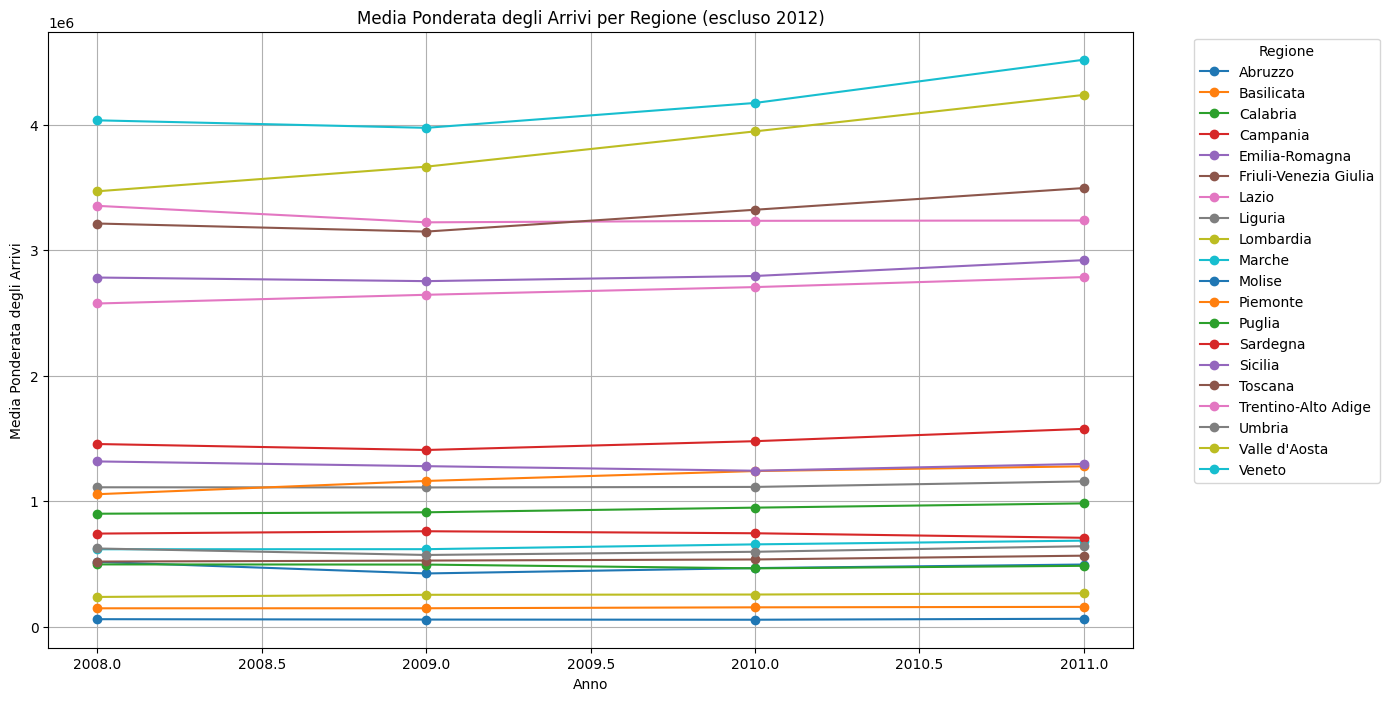

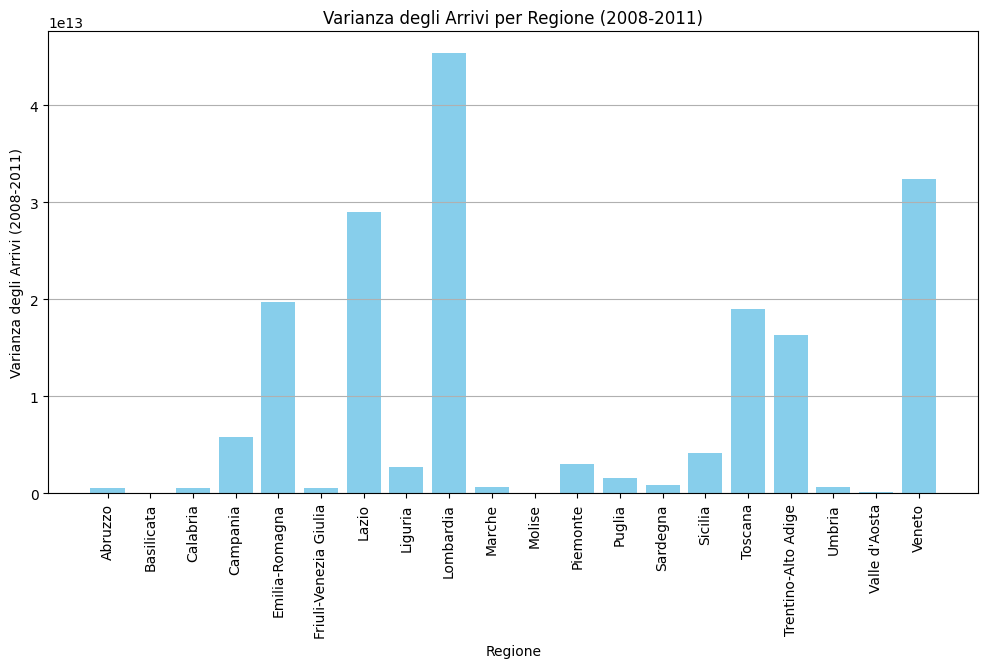

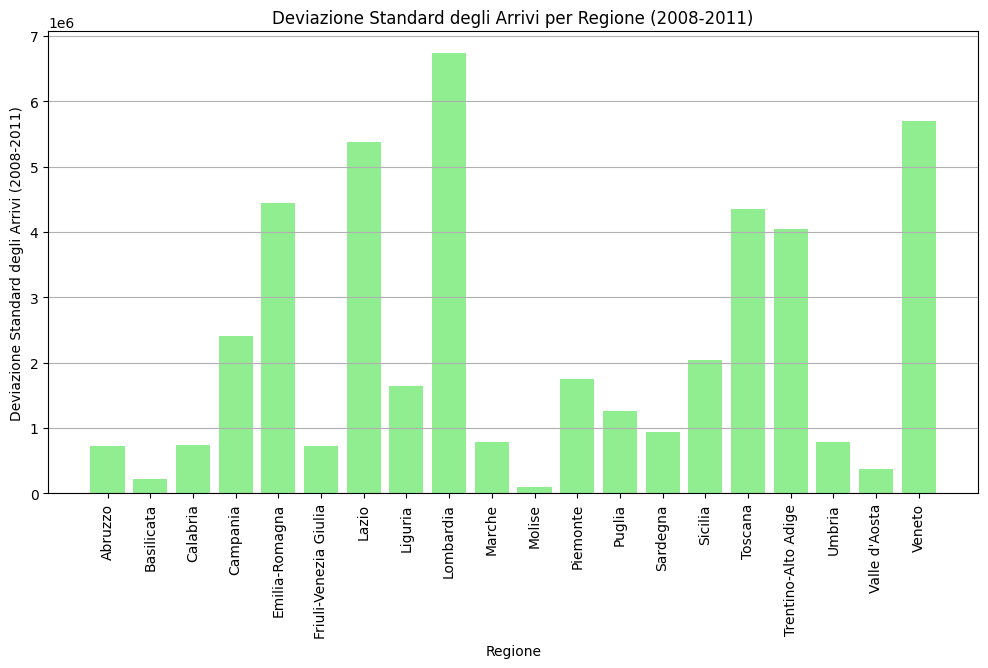

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs dei file CSV
file_paths = [
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Arrivi-negli-agriturismi-in-Italia-per-regione.csv',
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione.csv',
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Arrivi-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv'
]

# Caricamento dei DataFrame
dataframe1 = pd.read_csv(file_paths[0], delimiter=';')
dataframe2 = pd.read_csv(file_paths[1], delimiter=';')
dataframe3 = pd.read_csv(file_paths[2], delimiter=';')

# Ordinamento per colonna 'Regione'
sorted_dataframe1 = dataframe1.sort_values(by='Regione')
sorted_dataframe2 = dataframe2.sort_values(by='Regione')
sorted_dataframe3 = dataframe3.sort_values(by='Regione')

# Combinazione dei DataFrame
df_combined = pd.concat([sorted_dataframe1, sorted_dataframe2, sorted_dataframe3])

# Riempire i dati mancanti o rimuovere righe con dati mancanti
df_combined = df_combined.dropna()

# Aggiungere una colonna di pesi
df_combined['Pesi'] = 1  # Supponiamo che ogni arrivo abbia lo stesso peso

# Raggruppare per Regione e Anno
grouped = df_combined.groupby(['Regione', 'Anno'])

# Applicare la funzione per calcolare la media ponderata degli arrivi
result = grouped.apply(
    lambda x: pd.Series({
        'Media_Ponderata_Arrivi': (x['Arrivi'] * x['Pesi']).sum() / x['Pesi'].sum()
    })
).reset_index()

# Eliminare le righe corrispondenti all'anno 2012
# Poichè non presenti in tutti i 3 dataset
result = result[result['Anno'] != 2012]

# Visualizzare il DataFrame risultante
#print(result)

plt.figure(figsize=(14, 8))

for regione in result['Regione'].unique():
    subset = result[result['Regione'] == regione]
    plt.plot(subset['Anno'], subset['Media_Ponderata_Arrivi'], marker='o', label=regione)

plt.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Anno')
plt.ylabel('Media Ponderata degli Arrivi')
plt.title('Media Ponderata degli Arrivi per Regione (escluso 2012)')
plt.grid(True)
plt.show()


# Varianza su Grouped 'Arrivi'

variance_result = grouped.apply(
    lambda x: pd.Series({
        'Varianza_Arrivi': x.loc[(x['Anno'] >= 2008) & (x['Anno'] <= 2011), 'Arrivi'].var()
    })
).reset_index()

# Visualizzare il DataFrame con la varianza degli arrivi per ogni regione
#print(variance_result)

# Creare un grafico a barre per confrontare le varianze
plt.figure(figsize=(12, 6))
plt.bar(variance_result['Regione'], variance_result['Varianza_Arrivi'], color='skyblue')
plt.xlabel('Regione')
plt.ylabel('Varianza degli Arrivi (2008-2011)')
plt.title('Varianza degli Arrivi per Regione (2008-2011)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Calcolare la deviazione standard degli arrivi da 2008 a 2011 per ogni regione
std_result = grouped.apply(
    lambda x: pd.Series({
        'Deviazione_Standard_Arrivi': x.loc[(x['Anno'] >= 2008) & (x['Anno'] <= 2011), 'Arrivi'].std()
    })
).reset_index()

# Visualizzare il DataFrame con la deviazione standard degli arrivi per ogni regione
#print(std_result)

# Creare un grafico a barre per confrontare le deviazioni standard
plt.figure(figsize=(12, 6))
plt.bar(std_result['Regione'], std_result['Deviazione_Standard_Arrivi'], color='lightgreen')
plt.xlabel('Regione')
plt.ylabel('Deviazione Standard degli Arrivi (2008-2011)')
plt.title('Deviazione Standard degli Arrivi per Regione (2008-2011)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()



---

#Presenze

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs dei file CSV
file_paths = [
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Presenze-negli-agriturismi-in-Italia-per-regione.csv',
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Presenze-negli-esercizi-alberghieri-in-Italia-per-regione.csv',
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Presenze-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv'
]

# Caricamento dei DataFrame
dataframe1 = pd.read_csv(file_paths[0], delimiter=';')
dataframe2 = pd.read_csv(file_paths[1], delimiter=';')
dataframe3 = pd.read_csv(file_paths[2], delimiter=';')

# Ordinamento per colonna 'Regione'
sorted_dataframe1 = dataframe1.sort_values(by='Regione')
sorted_dataframe2 = dataframe2.sort_values(by='Regione')
sorted_dataframe3 = dataframe3.sort_values(by='Regione')

# Combinazione dei DataFrame
df_combined = pd.concat([sorted_dataframe1, sorted_dataframe2, sorted_dataframe3])

# Riempire i dati mancanti o rimuovere righe con dati mancanti
df_combined = df_combined.dropna()

# Aggiungere una colonna di pesi
df_combined['Pesi'] = 1  # Supponiamo che ogni arrivo abbia lo stesso peso

# Raggruppare per Regione e Anno
grouped = df_combined.groupby(['Regione', 'Anno'])

# Applicare la funzione per calcolare la media ponderata degli arrivi
result = grouped.apply(
    lambda x: pd.Series({
        'Media_Ponderata_Presenze': (x['Presenze'] * x['Pesi']).sum() / x['Pesi'].sum()
    })
).reset_index()

# Eliminare le righe corrispondenti all'anno 2012
result = result[result['Anno'] != 2012]

# Visualizzare il DataFrame risultante
#print(result)

plt.figure(figsize=(14, 8))

for regione in result['Regione'].unique():
    subset = result[result['Regione'] == regione]
    plt.plot(subset['Anno'], subset['Media_Ponderata_Presenze'], marker='o', label=regione)

plt.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Anno')
plt.ylabel('Media Ponderata delle Presenze')
plt.title('Media Ponderata delle Presenze per Regione (escluso 2012)')
plt.grid(True)
plt.show()


# Varianza su Grouped 'Arrivi'

variance_result = grouped.apply(
    lambda x: pd.Series({
        'Varianza_Presenze': x.loc[(x['Anno'] >= 2008) & (x['Anno'] <= 2011), 'Presenze'].var()
    })
).reset_index()

# Visualizzare il DataFrame con la varianza delle Presenze per ogni regione
#print(variance_result)

# Creare un grafico a barre per confrontare le varianze
plt.figure(figsize=(12, 6))
plt.bar(variance_result['Regione'], variance_result['Varianza_Presenze'], color='skyblue')
plt.xlabel('Regione')
plt.ylabel('Varianza delle Presenze (2008-2011)')
plt.title('Varianza delle Presenze per Regione (2008-2011)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Calcolare la deviazione standard degli arrivi da 2008 a 2011 per ogni regione
std_result = grouped.apply(
    lambda x: pd.Series({
        'Deviazione_Standard_Presenze': x.loc[(x['Anno'] >= 2008) & (x['Anno'] <= 2011), 'Presenze'].std()
    })
).reset_index()

# Visualizzare il DataFrame con la deviazione standard delle Presenze per ogni regione
#print(std_result)

# Creare un grafico a barre per confrontare le deviazioni standard
plt.figure(figsize=(12, 6))
plt.bar(std_result['Regione'], std_result['Deviazione_Standard_Presenze'], color='lightgreen')
plt.xlabel('Regione')
plt.ylabel('Deviazione Standard delle Presenze (2008-2011)')
plt.title('Deviazione Standard delle Presenze per Regione (2008-2011)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()




---

#Correlazione

---




,Regione,Correlazione_Arrivi_Presenze
0,Abruzzo,0.978804
1,Basilicata,0.817129
2,Calabria,0.894424
3,Campania,0.973363
4,Emilia-Romagna,0.476852
5,Friuli-Venezia Giulia,0.955944
6,Lazio,0.997881
7,Liguria,-0.116197
8,Lombardia,0.999300
9,Marche,0.147924


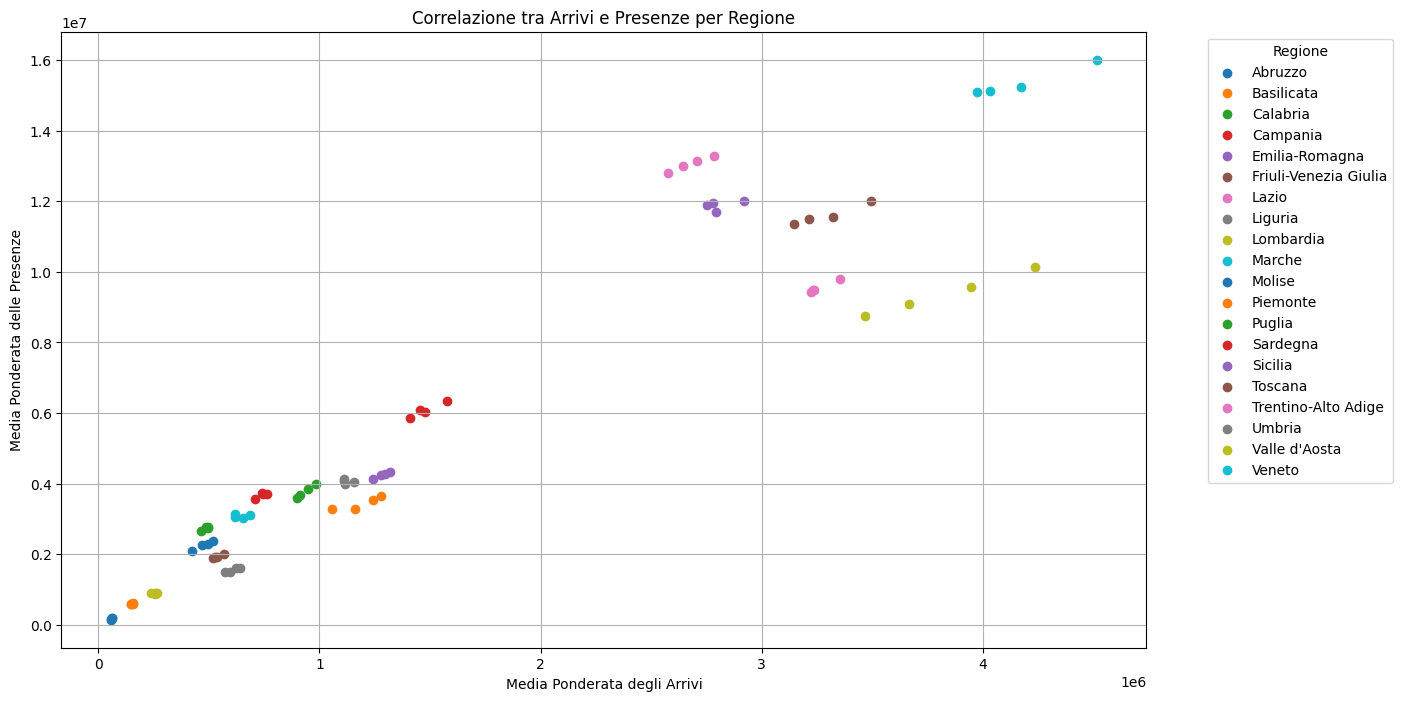

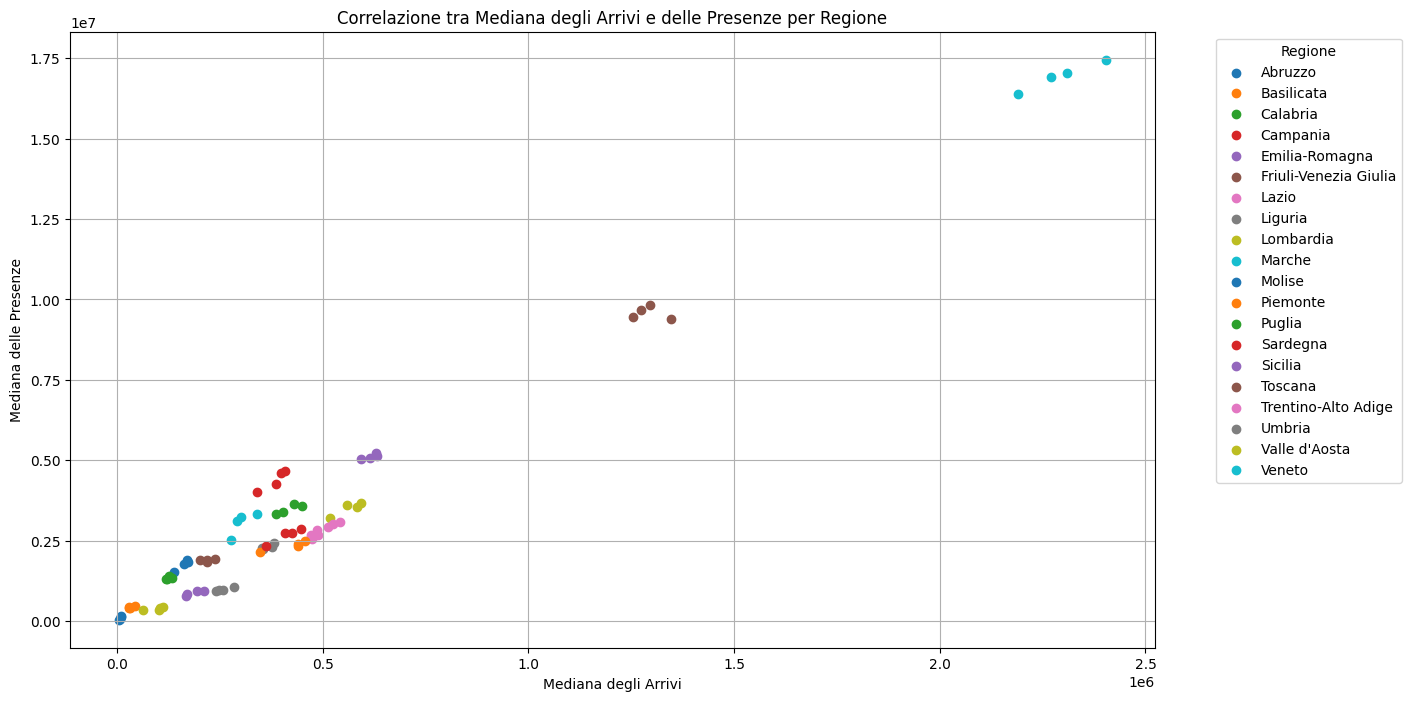

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs dei file CSV
arrivi_paths = [
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Arrivi-negli-agriturismi-in-Italia-per-regione.csv',
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione.csv',
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Arrivi-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv'
]

presenze_paths = [
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Presenze-negli-agriturismi-in-Italia-per-regione.csv',
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Presenze-negli-esercizi-alberghieri-in-Italia-per-regione.csv',
    'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Presenze-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv'
]

# Caricamento dei DataFrame
arrivi_dfs = [pd.read_csv(file_path, delimiter=';') for file_path in arrivi_paths]
presenze_dfs = [pd.read_csv(file_path, delimiter=';') for file_path in presenze_paths]

# Ordinamento per colonna 'Regione'
sorted_arrivi_dfs = [df.sort_values(by='Regione') for df in arrivi_dfs]
sorted_presenze_dfs = [df.sort_values(by='Regione') for df in presenze_dfs]

# Combinazione dei DataFrame
df_arrivi_combined = pd.concat(sorted_arrivi_dfs)
df_presenze_combined = pd.concat(sorted_presenze_dfs)

# Aggiungere una colonna di pesi
df_arrivi_combined['Pesi'] = 1  # Supponiamo che ogni arrivo abbia lo stesso peso
df_presenze_combined['Pesi'] = 1  # Supponiamo che ogni presenza abbia lo stesso peso

# Raggruppare per Regione e Anno
grouped_arrivi = df_arrivi_combined.groupby(['Regione', 'Anno'])
grouped_presenze = df_presenze_combined.groupby(['Regione', 'Anno'])

# Applicare la funzione per calcolare la media ponderata e la mediana degli arrivi
result_arrivi = grouped_arrivi.apply(
    lambda x: pd.Series({
        'Media_Ponderata_Arrivi': (x['Arrivi'] * x['Pesi']).sum() / x['Pesi'].sum(),
        'Mediana_Arrivi': x['Arrivi'].median()
    })
).reset_index()

# Applicare la funzione per calcolare la media ponderata e la mediana delle presenze
result_presenze = grouped_presenze.apply(
    lambda x: pd.Series({
        'Media_Ponderata_Presenze': (x['Presenze'] * x['Pesi']).sum() / x['Pesi'].sum(),
        'Mediana_Presenze': x['Presenze'].median()
    })
).reset_index()

# Eliminare le righe corrispondenti all'anno 2012
result_arrivi = result_arrivi[result_arrivi['Anno'] != 2012]
result_presenze = result_presenze[result_presenze['Anno'] != 2012]

# Merge dei due risultati per trovare la correlazione
merged_result = pd.merge(result_arrivi, result_presenze, on=['Regione', 'Anno'])

# Calcolare la correlazione tra arrivi e presenze
correlation = merged_result.groupby('Regione').apply(lambda x: x['Media_Ponderata_Arrivi'].corr(x['Media_Ponderata_Presenze'])).reset_index()
correlation.columns = ['Regione', 'Correlazione_Arrivi_Presenze']

# Visualizzare il DataFrame risultante
display(correlation)

# Visualizzare i grafici di correlazione
# Visualizzazione dei grafici di correlazione tra Media ponderata degli Arrivi e Media ponderata delle Presenze
plt.figure(figsize=(14, 8))
for regione in merged_result['Regione'].unique():
    subset = merged_result[merged_result['Regione'] == regione]
    plt.scatter(subset['Media_Ponderata_Arrivi'], subset['Media_Ponderata_Presenze'], label=regione)

plt.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Media Ponderata degli Arrivi')
plt.ylabel('Media Ponderata delle Presenze')
plt.title('Correlazione tra Arrivi e Presenze per Regione')
plt.grid(True)
plt.show()

# Visualizzazione dei grafici di correlazione tra Mediana degli Arrivi e Mediana delle Presenze
plt.figure(figsize=(14, 8))
for regione in merged_result['Regione'].unique():
    subset = merged_result[merged_result['Regione'] == regione]
    plt.scatter(subset['Mediana_Arrivi'], subset['Mediana_Presenze'], label=regione)

plt.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Mediana degli Arrivi')
plt.ylabel('Mediana delle Presenze')
plt.title('Correlazione tra Mediana degli Arrivi e delle Presenze per Regione')
plt.grid(True)
plt.show()



---


#ANALISI
Il grafico che mette in relazione la media ponderata degli arrivi con la media ponderata delle presenze è uno scatter plot (grafico a dispersione) che visualizza la correlazione tra due variabili.
In questo contesto:
- Media Ponderata degli Arrivi: Rappresenta il numero medio di arrivi in una determinata regione e anno, ponderato in base ai pesi assegnati (in questo caso, tutti uguali).
- Media Ponderata delle Presenze: Rappresenta il numero medio di presenze in una determinata regione e anno, ponderato nello stesso modo.
Come leggere il grafico
Punti del grafico:

Ogni punto nel grafico rappresenta una coppia (Media Ponderata degli Arrivi, Media Ponderata delle Presenze) per una specifica regione e anno.
La posizione di ciascun punto mostra la relazione tra i due valori per una regione e anno particolari.
- Asse X (Ascisse): Rappresenta la Media Ponderata degli Arrivi.
- Asse Y (Ordinate): Rappresenta la Media Ponderata delle Presenze.

Colori e Legenda:

I punti possono essere colorati per rappresentare diverse regioni. La legenda aiuta a identificare quali punti appartengono a quale regione.

Correlazione:

Se i punti tendono a formare una linea che sale da sinistra a destra, c'è una correlazione positiva: quando gli arrivi aumentano, aumentano anche le presenze.
Se i punti tendono a formare una linea che scende da sinistra a destra, c'è una correlazione negativa: quando gli arrivi aumentano, le presenze diminuiscono.
Se i punti sono sparsi senza una direzione chiara, non c'è correlazione evidente tra le due variabili.
Importanza della correlazione
- Correlazione Positiva: Indica che le regioni con più arrivi tendono ad avere più presenze, suggerendo che gli arrivi sono un buon indicatore del numero di presenze.
- Correlazione Negativa: Potrebbe indicare che ci sono fattori esterni che influenzano negativamente il numero di presenze nonostante l'aumento degli arrivi.
- Nessuna Correlazione: Potrebbe suggerire che altre variabili (non considerate in questa analisi) influenzano le presenze.

I valori negativi della correlazione tra arrivi e presenze sono accettabili, ma richiedono un'analisi approfondita. La correlazione negativa indica che all'aumentare degli arrivi, le presenze diminuiscono, o viceversa. Questo potrebbe essere dovuto a vari fattori, come stagionalità, eventi specifici in determinate regioni, o altre dinamiche turistiche.

Analisi dei valori negativi di correlazione
Per determinare se i valori negativi di correlazione sono accettabili o indicano un problema nei dati, possiamo:
- Verificare l'integrità dei dati.
- Analizzare i fattori esterni che potrebbero influenzare la correlazione.
- Considerare periodi di tempo o regioni specifiche separatamente.

Calcolare la mediana, oltre alla media ponderata, può essere molto utile per fornire una visione più completa della distribuzione dei dati. La mediana è meno sensibile agli outlier rispetto alla media e può offrire una rappresentazione più robusta della "posizione centrale" dei dati. Questo è particolarmente utile se i dati contengono valori estremi o distribuzioni asimmetriche.

Perché calcolare la mediana?
- Robustezza agli Outlier: La mediana non è influenzata da valori estremamente alti o bassi.
- Distribuzioni Asimmetriche: In presenza di distribuzioni non normali o asimmetriche, la mediana può fornire un'indicazione migliore della tendenza centrale rispetto alla media.
- Complemento alla Media: Fornendo sia la media che la mediana, si ottiene una visione più completa della distribuzione dei dati.

L'aggiunta del calcolo della mediana fornisce un ulteriore livello di approfondimento all'analisi degli arrivi e delle presenze turistiche in Italia. Mentre la media ponderata offre una visione generale, la mediana può rivelare informazioni importanti sulla distribuzione dei dati e sulla presenza di valori anomali. Combinando questi due approcci, l'analisi diventa più robusta e completa, permettendo di prendere decisioni più informate nel settore turistico.


---





---


#CONCLUSIONE


L'analisi eseguita fornisce una panoramica dettagliata degli arrivi turistici in Italia, suddivisi per regione e anno. Utilizzando tecniche di raggruppamento e calcolo della media ponderata, è possibile ottenere una visione chiara delle tendenze nel tempo. La varianza e la deviazione standard degli arrivi permettono di comprendere la dispersione dei dati e la variabilità delle presenze turistiche.

I grafici risultanti offrono una rappresentazione visiva efficace che aiuta a identificare pattern e anomalie nei dati. Questa analisi può essere utile per prendere decisioni informate nel settore turistico, come pianificare strategie di marketing mirate o migliorare l'offerta turistica in determinate regioni.

---

##Correlazione tra Arrivi e Presenze

Il grafico a dispersione che mette in relazione la media ponderata degli arrivi con quella delle presenze ha permesso di analizzare la correlazione tra queste due variabili. Una correlazione positiva suggerisce che le regioni con più arrivi tendono ad avere più presenze, indicando che gli arrivi sono un buon indicatore del numero di presenze. La presenza di correlazioni negative o assenti in alcune regioni richiede un'analisi più approfondita, considerando fattori esterni o dinamiche specifiche che potrebbero influenzare i risultati.





---

